# Flight Delay Analysis
## ISTM 6212 - Fall 2018 - Final Project
**Group 7: Ran He, Martim Silva, Maggie Wang, Mengfei Zhou**

<img  src="https://i.redd.it/cg0ukpij0t301.gif" width="35%" align="left">

*Source: United Airlines (https://i.redd.it/cg0ukpij0t301.gif)*

---

### Part 1 - Selection

#### Overview

The airline industry is fascinating, and is constantly changing. And with thousands of data points are generated each day, there is a very large opportunity for data analysis to be conducted. Most modern aircraft are now equipped with sensors that generate a myriad of data points. For example, when an aircraft is parked at the gate and it releases its parking brakes, a data point is generated that indicates that the plane has departed the gate 

Our group has therefore chosen to use the  Reporting Carrier On-Time Performance (1987-present) dataset from the Bureau of Transportation Statistics. This dataset provides a series of information regarding individual flights that flew within the United States (i.e.: only domestic flights are included, international flights are excluded). We are focusing our efforts on analyzing one of the most important operational flight performance metrics: minute delays for a flight. The dataset provides information regarding scheduled departure/arrival times and actual departure/arrival times, as well as the causes for delays. 

We looked into multiple datasets but this was the only one that contained day-specific information (all other datasets provided up to quarter/month information which would limit our ability to reach detailed conclusions).

The dataset may be found on: https://www.transtats.bts.gov/Tables.asp?DB_ID=120. Please note that the URL presents the user with two options:
- Marketing Carrier On-Time Performance (Beginning January 2018) - provides flight information as well as information about the operating airline. For example, usually short-haul flight are operated by regional airlines but branded as major airlines. A United Airlines flight from Washington Dulles Int’l (IAD) to Charlottesville (CHO) is most likely operated by one of United’s regional partners (Mesa Airlines, Air Wisconsin, Republic Airlines…) but is marketed as a United Flight (or United Express). In addition to providing information about the reporting/marketing airline (United), this dataset provides information about the operating airline (e.g.: Mesa Airlines)
- Reporting Carrier On-Time Performance (1987-present) - provides flight information as reported by the reporting / marketing airline.

Given that the former only includes data from January 2018 onwards, it wouldn’t satisfy our desire to analyze a year-long flight information dataset. In addition, we have no strong desire to analyze delays by operating carrier.

Furthemore, because of the rather large extent of the data (around 500,000 records per month for the entire US = 6,000,000 records for an entire year), we chose to focus our attention on flights that started and/or ended in the state of Virginia during the 2017 calendar year. The data is grouped into month-based dataframes (i.e.: all january flights are in the january.csv file), meaning that we have a total of twelve csv files that we will need to stack.


The airports in our dataset are the following (IATA code and Name):
- CHO - Charlottesville–Albemarle Airport
- DCA - Ronald Reagan Washington National Airport
- IAD - Washington Dulles International Airport
- ORF - Norfolk International Airport
- PHF - Newport News/Williamsburg International Airport
- RIC - Richmond International Airport 
- ROA - Roanoke Regional Airport 


#### Concerns & Challenges

We had many concerns and encountered many challenges in all stage of completing the projects. The following bullet points summarize our thought process at each stage of the project.

- We encountered two challenges/concerns relate to schema design. The first challenge relates to the number of fact tables. Since our analysis focus on delays, we had a hard time deciding whether we should have two fact tables (arrival delay table and departure delay table) or one fact table (flight performance table). Moving on to our concern, the concerns we had relate to arrival time key. Half way through creating the schema using SQL, we realized that arrival date of an overtime flight is different from its departure date. Thus, arrival time key should be different from departure time key for every overnight flights. Since our data set only contains departure date, arrival time keys would be incorrect if we create match arrival time key in the fact table using departure date.
- The challenge that took us the longest to figure out relates to data cleaning using Trifecta. To address the concern we discussed in the first bullet point, we created arrival timestamp based on departure timestamp. However, when we tried to split the arrival timestamp into year, month, and day, the split function in Trifacta kept getting us results with wildcards. We spent hours trying to debug. It turns out that it is an error on Trifacta's end. 
- The third challenge relates to the measurements regarding questions that we want to ask. We discussed about whether we should use average or count to perform our analysis. 
- The last challenge relate to the analysis process. We ran into an issue with regards to properly calculate the percentage of arrival and departure delay for each airlines. We realized that the where statement and the group by function result in miscalculation and return 100% for all airlines.  We then tried to do sub-queries. While the sub-queries work, it took us a long time to figure it out and it is hard to understand. We finally figured out a much easier solution perform in the analysis session of the notebook. 

---

#### Getting Started

**("Flight Attendants, Doors to Departure, Crosscheck and All-Call. Let's Get Ready For Takeoff"):**

We will start by downloading our data from an S3 bucket using the `wget` command:

In [1]:
!wget https://s3.amazonaws.com/2018-dmfa-group7/final_project/flight_delays_project.zip

--2018-12-10 17:47:20--  https://s3.amazonaws.com/2018-dmfa-group7/final_project/flight_delays_project.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.100.213
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.100.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7750286 (7.4M) [application/zip]
Saving to: ‘flight_delays_project.zip’

flight_delays_proje 100%[===================>]   7.39M  35.4MB/s    in 0.2s    

2018-12-10 17:47:20 (35.4 MB/s) - ‘flight_delays_project.zip’ saved [7750286/7750286]



We will now unzip the contents of this .zip file:

In [2]:
!unzip flight_delays_project

Archive:  flight_delays_project.zip
  inflating: VA_DELAYS_2017_08.csv   
   creating: __MACOSX/
  inflating: __MACOSX/._VA_DELAYS_2017_08.csv  
  inflating: VA_DELAYS_2017_09.csv   
  inflating: __MACOSX/._VA_DELAYS_2017_09.csv  
  inflating: VA_DELAYS_2017_10.csv   
  inflating: __MACOSX/._VA_DELAYS_2017_10.csv  
  inflating: VA_DELAYS_2017_04.csv   
  inflating: __MACOSX/._VA_DELAYS_2017_04.csv  
  inflating: VA_DELAYS_2017_05.csv   
  inflating: __MACOSX/._VA_DELAYS_2017_05.csv  
  inflating: VA_DELAYS_2017_11.csv   
  inflating: __MACOSX/._VA_DELAYS_2017_11.csv  
  inflating: VA_DELAYS_2017_07.csv   
  inflating: __MACOSX/._VA_DELAYS_2017_07.csv  
  inflating: VA_DELAYS_2017_12.csv   
  inflating: __MACOSX/._VA_DELAYS_2017_12.csv  
  inflating: VA_DELAYS_2017_06.csv   
  inflating: __MACOSX/._VA_DELAYS_2017_06.csv  
  inflating: VA_DELAYS_2017_02.csv   
  inflating: __MACOSX/._VA_DELAYS_2017_02.csv  
  inflating: VA_DELAYS_2017_03.csv   
  inflating: __MACOSX/._VA_DELAYS_2017_03.c

We will now combine the twelve .csv files into a single .csv file using the handy `csvstack` command. We will also name this new file *flights_original.csv*:

In [3]:
!csvstack VA_DELAYS*.csv > flights_original.csv

We no longer need the individual month files, let's go ahead and delete them to reduce clutter:

In [4]:
!rm VA_DELAYS*.csv

In [5]:
!rm flight_delays*.zip

Perfect! We should be all set to conduct some initial explorations of our data.

#### Data Exploration

Let's start by obtaining the number of records that we will be analyzing:

The following line of code will take a minute to run.

In [6]:
!wc -l flights_original.csv

285455 flights_original.csv


Next, let's obtain the column names:

In [7]:
!csvcut -n flights_original.csv

  1: YEAR
  2: MONTH
  3: DAY_OF_MONTH
  4: OP_CARRIER
  5: TAIL_NUM
  6: OP_CARRIER_FL_NUM
  7: ORIGIN
  8: ORIGIN_CITY_NAME
  9: ORIGIN_STATE_ABR
 10: DEST
 11: DEST_CITY_NAME
 12: DEST_STATE_ABR
 13: CRS_DEP_TIME
 14: DEP_TIME
 15: DEP_DELAY
 16: DEP_TIME_BLK
 17: CRS_ARR_TIME
 18: ARR_TIME
 19: ARR_DELAY
 20: ARR_TIME_BLK
 21: CANCELLED
 22: DIVERTED
 23: CRS_ELAPSED_TIME
 24: ACTUAL_ELAPSED_TIME
 25: CARRIER_DELAY
 26: WEATHER_DELAY
 27: NAS_DELAY
 28: SECURITY_DELAY
 29: LATE_AIRCRAFT_DELAY
 30: DIV_REACHED_DEST
 31: DIV_ACTUAL_ELAPSED_TIME
 32: DIV_ARR_DELAY
 33: DIV_DISTANCE
 34: DIV1_AIRPORT
 35: 


Let's obtain some information about a small sample of the variables:

In [8]:
!head flights_original.csv | csvstat

/home/ubuntu/.local/lib/python3.5/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 34 has no name. Using "ii".
  1. "YEAR"

	Type of data:          Number
	Contains null values:  False
	Unique values:         1
	Smallest value:        2,017
	Largest value:         2,017
	Sum:                   18,153
	Mean:                  2,017
	Median:                2,017
	StDev:                 0
	Most common values:    2,017 (9x)

  2. "MONTH"

	Type of data:          Boolean
	Contains null values:  False
	Unique values:         1
	Most common values:    True (9x)

  3. "DAY_OF_MONTH"

	Type of data:          Number
	Contains null values:  False
	Unique values:         9
	Smallest value:        1
	Largest value:         9
	Sum:                   45
	Mean:                  5
	Median:                5
	StDev:                 2.739
	Most common values:    1 (1x)
	                       2 (1x)
	                       3 (1x)
	                       4 (1x)
	                       5 (1x)



Lastly, let's identify if there are any columns that contain null values:

In [9]:
!head -n 5000 flights_original.csv | csvstat --nulls

/home/ubuntu/.local/lib/python3.5/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 34 has no name. Using "ii".
  1. YEAR: False
  2. MONTH: False
  3. DAY_OF_MONTH: False
  4. OP_CARRIER: False
  5. TAIL_NUM: True
  6. OP_CARRIER_FL_NUM: False
  7. ORIGIN: False
  8. ORIGIN_CITY_NAME: False
  9. ORIGIN_STATE_ABR: False
 10. DEST: False
 11. DEST_CITY_NAME: False
 12. DEST_STATE_ABR: False
 13. CRS_DEP_TIME: False
 14. DEP_TIME: True
 15. DEP_DELAY: True
 16. DEP_TIME_BLK: False
 17. CRS_ARR_TIME: False
 18. ARR_TIME: True
 19. ARR_DELAY: True
 20. ARR_TIME_BLK: False
 21. CANCELLED: False
 22. DIVERTED: False
 23. CRS_ELAPSED_TIME: False
 24. ACTUAL_ELAPSED_TIME: True
 25. CARRIER_DELAY: True
 26. WEATHER_DELAY: True
 27. NAS_DELAY: True
 28. SECURITY_DELAY: True
 29. LATE_AIRCRAFT_DELAY: True
 30. DIV_REACHED_DEST: True
 31. DIV_ACTUAL_ELAPSED_TIME: True
 32. DIV_ARR_DELAY: True
 33. DIV_DISTANCE: True
 34. DIV1_AIRPORT: True
 35. ii: True


It appears that `TAIL_NUM`, `DEP_TIME`, `DEP_DELAY`, `ARR_TIME`, `ARR_DELAY`, `ACTUAL_ELAPSED_TIME`, ` CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY`, `SECURITY_DELAY`, `LATE_AIRCRAFT_DELAY`, `DIV_REACHED_DEST`, `DIV_ACTUAL_ELAPSED_TIME`, `DIV_ARR_DELAY`, `DIV_DISTANCE`, and `DIV1_AIRPORT` contain null values. We will handle these when we wrangle our data. We also have a 35th column that appears to be blank (we'll remove this later).

Let's preview some data:

In [10]:
!csvcut -c 1-34 flights_original.csv | head -n 5

YEAR,MONTH,DAY_OF_MONTH,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT
2017,1,1,AA,N3HMAA,52,LAX,"Los Angeles, CA",CA,DCA,"Washington, DC",VA,1240,1237,-3.00,1200-1259,2037,2025,-12.00,2000-2059,0.00,0.00,297.00,288.00,,,,,,,,,,
2017,1,2,AA,N3CFAA,52,LAX,"Los Angeles, CA",CA,DCA,"Washington, DC",VA,1240,1252,12.00,1200-1259,2037,2028,-9.00,2000-2059,0.00,0.00,297.00,276.00,,,,,,,,,,
2017,1,3,AA,N3NRAA,52,LAX,"Los Angeles, CA",CA,DCA,"Washington, DC",VA,1240,1238,-2.00,1200-1259,2037,1954,-43.00,2000-2059,0.00,0.00,297.00,256.00,,,,,,,,,,
2017,1,4,AA,N3GAAA,52,LAX,"Los Angeles, CA",CA,DCA,"Washington, DC",VA,1240,1314,34.00,12

**Variable Descriptions**

Please find a description of all variables below:
- YEAR: Flight year
- MONTH: Flight month
- DAY_OF_MONTH: Flight day
- OP_CARRIER: Airline (e.g: UA, WN, AA…)
- TAIL_NUM: Plane registration number (unique)
- OP_CARRIER_FL_NUM: Flight number
- ORIGIN:  Origin / Departure Airport Code (e.g.: IAD, DCA…)
- ORIGIN_CITY_NAME: City, State Abbreviation - we can wrangle this to just get city name
- ORIGIN_STATE_ABR: State Abbreviation (e.g.: VA)
- DEST: Destination / Arrival Airport Code (e.g.: IAD, DCA…)
- DEST_CITY_NAME: City, State Abbreviation - we can wrangle this to just get city name
- DEST_STATE_ABR: State Abbreviation (e.g.: VA)
- CRS_DEP_TIME: Scheduled departure time (Computer Reservation System)
- DEP_TIME: Actual departure time
- DEP_DELAY: Actual - Scheduled time (can be - and +)
- DEP_TIME_BLK: Distribution of actual departure time and scheduled time by time block
- CRS_ARR_TIME: Scheduled arrival time (Computer Reservation System)
- ARR_TIME: Actual arrival time
- ARR_DELAY: Actual - Scheduled time (can be - and +)
- ARR_TIME_BLK: Distribution of actual arrival time and scheduled time by time block
- CANCELLED: Flights cancelled
- DIVERTED: Filghts diverted to places other than original destinations
- CRS_ELAPSED_TIME: Scheduled flight length (includes ground movement)
- ACTUAL_ELAPSED_TIME: Actual flight length (includes ground movement)
- CARRIER_DELAY: Minute delays caused by carrier
- WEATHER_DELAY: Minute delays caused by weather
- NAS_DELAY: Minute delays caused by air traffic
- SECURITY_DELAY: Minute delays caused by security reasons
- LATE_AIRCRAFT_DELAY: Minute delays caused by late inbound aircraft

**Facts & Dimensions**

The following variables are dimensions:
- YEAR
- MONTH
- DAY_OF_MONTH
- OP_CARRIER
- TAIL_NUM
- OP_CARRIER_FL_NUM
- ORIGIN
- ORIGIN_CITY_NAME
- ORIGIN_STATE_ABR
- CRS_DEP_TIME
- DEP_TIME
- DEP_TIME_BLK
- DEST
- DEST_CITY_NAME
- DEST_STATE_ABR
- CRS_ARR_TIME
- ARR_TIME
- ARR_TIME_BLK
- CANCELLED
- DIVERTED
- CRS_ELAPSED_TIME
- ACTUAL_ELAPSED_TIME

And the following variables are facts:
- DEP_DELAY
- ARR_DELAY
- CARRIER_DELAY
- WEATHER_DELAY
- NAS_DELAY
- SECURITY_DELAY
- LATE_AIRCRAFT_DELAY


The schema that we designed in the following contains only one fact table. We decided to have one fact table becasue we think that each flight is an unique record. Therefore, it makes sence to have flight as a fact.

**Project Goals & Next Steps**

Based on this information we seek to answer the following questions / accomplish the following goals:
- How do airlines and airports perform? Noted that evaluation is based on the percentage of arrival and departure delayed flight.
- Which airlines experience the most and least delays flying out/in of VA airports?
- Which VA airport has the highest/lowest average arrival / departure minute delay?
- What is the main causes for delays for airlines flying out/in VA airports? What are the average delayed time of flight delay resulting from the same reason?
- What are the timeblocks in the day when there is the highest/lowest average delay?

Based on the exploration conducted above as well as our project goals, we will need to accomplish the following wrangling tasks:
- Clean the data on issues such as data type, missing data, mismatched data
- Add columns about geographic information for the airports
- Delete columns that are considered redundant based on our schema

The detailed process of wrangling is specified in Part 2 

After the wrangling is completed, we expect our schema to be the following (includes the tables that we will add for the bonus section):

<img src="https://s3.amazonaws.com/2018-dmfa-group7/final_project/schema.png">

---

### Part 2 - Wrangling & Data Preparation

#### Trifacta

We downloaded our *flights.csv* file and uploaded it to Triffacta. Given that the file size was below 100MB we had no trouble wrangling the data in a single process.

Before we wrangle the data, since the dataset only contains the Year, Month, Day information for the departure, we would like to create the date information for arrivals so that we correctly label the arrival date for flights that arrive overnight (on the next day). Our method to create the arrival date information is described below.

**Wrangling using Trifacta**

The main steps we wrangled our data include: <br>
- a. Filtered and dropped the rows where the flight is canceled or diverted using since we will focus on analyzing delays; <br>
- b. Dealt with null values. Specifically for the five columns that record the minutes for each reason of delays, there are null values if the flight did not delay. We replace all the nulls with '0' which makes sense if the flight was not delayed and it would not harm our analysis;<br>
- c. Joined another csv file we found based on the unique airport name (eg. 'DCA') to create the longitude and latitude for both origin airports and destination airpots;<br>
- d. Created a column name 'overnight' using 'IF...ELSE' function based on our method explained above;<br>
- e. Merged the YEAR, MONTH, DAY to create a new column of departure date, then use 'DATEADD' function to create the correct arrival date for overnight flights, and save the arrival date for all flights in a new column;<br>
- f. Splitted the arrival date column to retrieve year, month, day of arrival in three columns;<br>
- g. Formatted, renamed and reordered some coloumns to ensure the correct data type, column name and appropriate order for our schema;<br>
- h. Dropped columns that will not be used for this project based on our designed schema.

**Recipe**

Please find our final recipe below:

<img width="40%" src="https://s3.amazonaws.com/2018-dmfa-group7/final_project/recipe.jpg"/>

Please note that this is how we calculated how long our overnight interval should be (this will take a few seconds):

In [11]:
!csvcut flights_original.csv -c CRS_ELAPSED_TIME | csvstat --max

648


The longest flight was scheduled to last 648 minutes which equals to about 11 hours:
- For the last possible arrival on the same day: 2359-11h = 1259 (military time); this means that if the longest flight took off by 12:59PM (1:00PM rounded) it will arrive to its destination on the same day.
- For the latest arrival: 2359+11h = 1059 (military time); this means that if the longest flight took off at 11:59PM (latest possible time) it will arrive to its destination by 10:59AM (11:00AM rounded).

We will therefore label a flight as being an overnight flights if it took off after **1:00PM** (rounded) and landed before **11:00AM** (rounded). This will work because if a flight does not cross into the following day, there is no way it will travel back in time to landing before the take-off time. 

We are aware of the different timezones in the United States, but given that there is a two-hour difference between the two times, it means that a flight would have to go through three timezones in one hour to 'travel back' to 11:00AM. In other words, a flight would have to go from Indiana's most western point (EST = 1PM) to Nevada most easter point (PST = 10AM) at a speed of:

In [12]:
distance_km = 2256 #Source: https://www.distancefromto.net/
time_hour = 1
speed = (distance_km)/(time_hour)
speed

2256.0

This speed is even higher than the maxmimum speed at which the Concorde (fastes passenger plane ever built) was capabale of flying (around 2,172 km/h according to http://www.guinnessworldrecords.com/news/60at60/2015/8/1996-fastest-flight-across-the-atlantic-in-a-commercial-aircraft-392882 ). To summarize, there is no way a plane would be able to take-off at 1:00PM somewhere in the United States and land at 11:00AM of the same day somewhere in the United States.

**Loading the Data**

Let's download the wrangled dataset:

In [13]:
!wget https://s3.amazonaws.com/2018-dmfa-group7/final_project/VA_flight_delays_2017_final.csv

--2018-12-10 17:48:04--  https://s3.amazonaws.com/2018-dmfa-group7/final_project/VA_flight_delays_2017_final.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.165.93
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.165.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60381737 (58M) [text/csv]
Saving to: ‘VA_flight_delays_2017_final.csv’

VA_flight_delays_20 100%[===================>]  57.58M  34.3MB/s    in 1.7s    

2018-12-10 17:48:05 (34.3 MB/s) - ‘VA_flight_delays_2017_final.csv’ saved [60381737/60381737]



Similarly to what we did above, let's rename this file:

In [14]:
!mv VA_flight_delays_2017_final.csv flights.csv

Let's obtain a row count:

In [15]:
!csvstat --count flights.csv

Killed


Let's preview the column names:

In [16]:
!csvcut -n flights.csv

  1: DEP_YEAR
  2: DEP_MONTH
  3: DEP_DAY_OF_MONTH
  4: OP_CARRIER
  5: TAIL_NUM
  6: OP_CARRIER_FL_NUM
  7: ORIGIN
  8: ORIGIN_CITY_NAME
  9: ORIGIN_STATE_ABR
 10: DEST
 11: DEST_CITY_NAME
 12: DEST_STATE_ABR
 13: DEP_DELAY
 14: DEP_TIME_BLK
 15: ARR_YEAR
 16: ARR_MONTH
 17: ARR_DAY
 18: ARR_DELAY
 19: ARR_TIME_BLK
 20: CARRIER_DELAY
 21: WEATHER_DELAY
 22: NAS_DELAY
 23: SECURITY_DELAY
 24: LATE_AIRCRAFT_DELAY
 25: ORIGIN_LATITUDE
 26: ORGIN_LONGITUDE
 27: DEST_LATITUDE
 28: DEST_LONGITUDE


Let's preview the dataset:

In [17]:
!head -2 flights.csv | csvlook

| DEP_YEAR | DEP_MONTH | DEP_DAY_OF_MONTH | OP_CARRIER | TAIL_NUM | OP_CARRIER_FL_NUM | ORIGIN | ORIGIN_CITY_NAME | ORIGIN_STATE_ABR | DEST | DEST_CITY_NAME  | DEST_STATE_ABR | DEP_DELAY | DEP_TIME_BLK | ARR_YEAR | ARR_MONTH | ARR_DAY | ARR_DELAY | ARR_TIME_BLK | CARRIER_DELAY | WEATHER_DELAY | NAS_DELAY | SECURITY_DELAY | LATE_AIRCRAFT_DELAY | ORIGIN_LATITUDE | ORGIN_LONGITUDE | DEST_LATITUDE | DEST_LONGITUDE |
| -------- | --------- | ---------------- | ---------- | -------- | ----------------- | ------ | ---------------- | ---------------- | ---- | --------------- | -------------- | --------- | ------------ | -------- | --------- | ------- | --------- | ------------ | ------------- | ------------- | --------- | -------------- | ------------------- | --------------- | --------------- | ------------- | -------------- |
|    2,017 |      True |                5 | WN         | N258WN   |               284 | DCA    | Washington, DC   | VA               | MSY  | New Orleans, LA | LA      

Please note that we added the following variables:
- Date information for arrivals. This includes three columns which are 'ARR_YEAR', 'ARR_MONTH', and 'ARR_DAY';
- Geographic information for aiports. This includes four columns which are 'ORIGIN_LATITUDE', 'ORGIN_LONGITUDE', 'DEST_LATITUDE', and 'DEST_LONGITUDE'.

Thus a total of 7 columns were added to the original dataset.

#### Creating The Schema

Let's start by loading the SQL environment, dropping the database if it already exists, creating a new database and loading it:

In [1]:
%load_ext sql

In [19]:
!dropdb --if-exists -U student FinalProject

In [20]:
!createdb -U student FinalProject

In [2]:
%sql postgresql://student@/FinalProject

'Connected: student@FinalProject'

Now that we have SQL configured, let's go ahead and create our master table (this is where we will import our CSV data into. We will first drop the table if it already exists and then create the different variables: [UPDATE]

In [22]:
%%sql
DROP TABLE IF EXISTS flight_perf;

CREATE TABLE flight_perf (
    dep_year INTEGER,
    dep_month INTEGER,
    dep_day INTEGER,
    carrier CHAR(2),
    tail_num CHAR(6),
    fl_num VARCHAR(8),
    dep_airport CHAR(3),
    dep_city VARCHAR(50),
    dep_state CHAR(2),
    arr_airport CHAR(3),
    arr_city VARCHAR(50),
    arr_state CHAR(2),
    dep_delay INTEGER,
    dep_timeblock CHAR(9),
    arr_year INTEGER,
    arr_month INTEGER,
    arr_day INTEGER,
    arr_delay INTEGER,
    arr_timeblock CHAR(9),
    reason_carrier INTEGER,
    reason_weather INTEGER,
    reason_airtraffic INTEGER,
    reason_security INTEGER,
    reason_lateplane INTEGER,
    dep_lat FLOAT,
    dep_lon FLOAT,
    arr_lat FLOAT,
    arr_lon FLOAT
)

 * postgresql://student@/FinalProject
Done.
Done.


[]

Let's preview our table (there will be no records, just headers):

In [23]:
%%sql
SELECT * 
FROM flight_perf
LIMIT 10

 * postgresql://student@/FinalProject
0 rows affected.


dep_year,dep_month,dep_day,carrier,tail_num,fl_num,dep_airport,dep_city,dep_state,arr_airport,arr_city,arr_state,dep_delay,dep_timeblock,arr_year,arr_month,arr_day,arr_delay,arr_timeblock,reason_carrier,reason_weather,reason_airtraffic,reason_security,reason_lateplane,dep_lat,dep_lon,arr_lat,arr_lon


Now that the table has been created, we will fill it with the contents in our *flights.csv* file:

In [24]:
%%sql
COPY flight_perf FROM '/home/ubuntu/flights.csv'
CSV
HEADER;

 * postgresql://student@/FinalProject
280074 rows affected.


[]

Let's see what it looks like:

In [25]:
%%sql
SELECT *
FROM flight_perf
LIMIT 5;

 * postgresql://student@/FinalProject
5 rows affected.


dep_year,dep_month,dep_day,carrier,tail_num,fl_num,dep_airport,dep_city,dep_state,arr_airport,arr_city,arr_state,dep_delay,dep_timeblock,arr_year,arr_month,arr_day,arr_delay,arr_timeblock,reason_carrier,reason_weather,reason_airtraffic,reason_security,reason_lateplane,dep_lat,dep_lon,arr_lat,arr_lon
2017,1,5,WN,N258WN,284,DCA,"Washington, DC",VA,MSY,"New Orleans, LA",LA,18,1200-1259,2017,1,5,8,1400-1459,0,0,0,0,0,38.85138889,-77.03777778,29.99333333,-90.25916667
2017,1,5,WN,N710SW,4850,DCA,"Washington, DC",VA,MSY,"New Orleans, LA",LA,16,1800-1859,2017,1,5,13,2000-2059,0,0,0,0,0,38.85138889,-77.03777778,29.99333333,-90.25916667
2017,1,14,WN,N955WN,2628,DCA,"Washington, DC",VA,MSY,"New Orleans, LA",LA,14,1800-1859,2017,1,14,-5,1900-1959,0,0,0,0,0,38.85138889,-77.03777778,29.99333333,-90.25916667
2017,1,14,WN,N936WN,5245,DCA,"Washington, DC",VA,MSY,"New Orleans, LA",LA,-3,1100-1159,2017,1,14,-24,1300-1359,0,0,0,0,0,38.85138889,-77.03777778,29.99333333,-90.25916667
2017,1,15,WN,N449WN,5122,DCA,"Washington, DC",VA,MSY,"New Orleans, LA",LA,-5,1200-1259,2017,1,15,-21,1400-1459,0,0,0,0,0,38.85138889,-77.03777778,29.99333333,-90.25916667


 Beautiful!

Now that we have our fact table created, we will go ahead and create our dimension tables. Based on the schema above, we are going to have the following tables:
- `AIRPORT`
- `AIRLINE`
- `DATETIME`
- `FLIGHT`
- `AIRCRAFT`
- `WEATHER`

**Airline Table**

Let's start with the `airline` table. We'll start by creating an empty table:

In [26]:
%%sql
DROP TABLE IF EXISTS airline;

CREATE TABLE airline (
    airline_key SERIAL PRIMARY KEY,
    carrier CHAR(2)
   
)

 * postgresql://student@/FinalProject
Done.
Done.


[]

We'll now insert information from our main `flight_perf` table into the newly-created `airline` table:

In [27]:
%%sql
INSERT INTO airline (carrier)
SELECT DISTINCT carrier
FROM flight_perf;

 * postgresql://student@/FinalProject
10 rows affected.


[]

In [28]:
%%sql
SELECT *
FROM airline
ORDER BY carrier

 * postgresql://student@/FinalProject
10 rows affected.


airline_key,carrier
7,AA
1,AS
2,B6
4,DL
8,EV
6,F9
10,OO
5,UA
3,VX
9,WN


To verify that we got all of the airlines covered, let's quickly run a pipe command on our CSV file to retrieve the airline names (we will start by selecting only the OP_CARRIER column, sorting it in ascending order, and printing the distinct values):

In [29]:
!head -n 8000 flights_original.csv | csvcut -c OP_CARRIER | csvsort | uniq

OP_CARRIER
AA
AS
B6
DL
EV
F9
OO
UA
VX
WN


We have a match!

The next step is to create a surrogate key in the fact table (`flight_perf`) that references the airline_key column in the `airline` table:

In [30]:
%%sql
ALTER TABLE flight_perf
ADD COLUMN airline_key INTEGER,
ADD CONSTRAINT fk_airline_key
    FOREIGN KEY (airline_key)
    REFERENCES airline (airline_key);

 * postgresql://student@/FinalProject
Done.


[]

First let's create an index on all columns in `airline` to improve the performance of queries.

In [31]:
%%sql
DROP INDEX IF EXISTS idx_airline;

CREATE INDEX idx_airline ON airline (carrier);

 * postgresql://student@/FinalProject
Done.
Done.


[]

We will now populate the airline_key column in `flight_perf` with some values. To do so, we'll match the data in both the `flight_perf` and `airline` tables:

In [32]:
%%sql
UPDATE FLIGHT_PERF
SET airline_key = AIRLINE.airline_key
FROM AIRLINE
WHERE FLIGHT_PERF.carrier = AIRLINE.carrier

 * postgresql://student@/FinalProject
280074 rows affected.


[]

Let's preview what we did:

In [33]:
%%sql
SELECT dep_year, dep_month, dep_day, carrier, dep_airport, arr_airport, airline_key
FROM FLIGHT_PERF
LIMIT 5

 * postgresql://student@/FinalProject
5 rows affected.


dep_year,dep_month,dep_day,carrier,dep_airport,arr_airport,airline_key
2017,1,5,WN,DCA,MSY,9
2017,1,5,WN,DCA,MSY,9
2017,1,14,WN,DCA,MSY,9
2017,1,14,WN,DCA,MSY,9
2017,1,15,WN,DCA,MSY,9


Great! The keys match the carriers.

**Datetime Table**

We'll start by creating an empty table:

In [34]:
%%sql
DROP TABLE IF EXISTS datetime;

CREATE TABLE datetime (
    datetime_key SERIAL PRIMARY KEY,
    day INTEGER,
    month INTEGER,
    year INTEGER,
    timeblock CHAR(9)   
)

 * postgresql://student@/FinalProject
Done.
Done.


[]

We'll now insert information from our main `flight_perf` table into the newly-created `datetime` table. Given that there are arrival and departure times, we will go ahead and inner join the two SELECT statements to obtain distinct values:

In [35]:
%%sql
INSERT INTO datetime (day,month,year,timeblock)
SELECT DISTINCT dep_day, dep_month, dep_year, dep_timeblock 
FROM flight_perf
UNION
SELECT DISTINCT arr_day, arr_month, arr_year, arr_timeblock 
FROM flight_perf;

 * postgresql://student@/FinalProject
6938 rows affected.


[]

The next step is to create surrogate keys in the fact table (`flight_perf`) that references the datetime_key column in the `datetime` table. Given that departure time is not equal to arrival time, we will need to create two surrogate keys within our fact table:

In [36]:
%%sql
ALTER TABLE flight_perf
ADD COLUMN dep_datetime_key INTEGER,
ADD CONSTRAINT fk_dep_datetime_key
    FOREIGN KEY (dep_datetime_key)
    REFERENCES datetime (datetime_key);
    
ALTER TABLE flight_perf
ADD COLUMN arr_datetime_key INTEGER,
ADD CONSTRAINT fk_arr_datetime_key
    FOREIGN KEY (arr_datetime_key)
    REFERENCES datetime (datetime_key);

 * postgresql://student@/FinalProject
Done.
Done.


[]

First let's create an index on all columns in `datetime` to improve the performance of queries.

In [37]:
%%sql
DROP INDEX IF EXISTS idx_dep_datetime;
CREATE INDEX idx_dep_datetime ON datetime (day,month,year,timeblock);

DROP INDEX IF EXISTS idx_arr_datetime;
CREATE INDEX idx_arr_datetime ON datetime (day,month,year,timeblock);

 * postgresql://student@/FinalProject
Done.
Done.
Done.
Done.


[]

We will now populate the *datetime_key columns in `flight_perf` with some values. To do so, we'll match the data in both the `flight_perf` and `datetime` tables:

In [38]:
%%sql
UPDATE flight_perf
SET dep_datetime_key = datetime.datetime_key
FROM DATETIME
WHERE flight_perf.dep_day = datetime.day
AND flight_perf.dep_month = datetime.month
AND flight_perf.dep_year = datetime.year
AND flight_perf.dep_timeblock = datetime.timeblock;

UPDATE flight_perf
SET arr_datetime_key = datetime.datetime_key
FROM datetime
WHERE flight_perf.arr_day = datetime.day
AND flight_perf.arr_month = datetime.month
AND flight_perf.arr_year = datetime.year
AND flight_perf.arr_timeblock = datetime.timeblock

 * postgresql://student@/FinalProject
280074 rows affected.
280074 rows affected.


[]

Preview Data. If it was done properly, the arr_datetime_key for the first query will the same as the dep_datetime_key for the second query:

In [39]:
%%sql
SELECT dep_month, dep_day, arr_month, arr_day, dep_datetime_key, arr_datetime_key
FROM flight_perf
WHERE dep_month = '2' AND dep_day = '12' AND dep_timeblock = '2300-2359' AND arr_timeblock='0600-0659'
LIMIT 1

 * postgresql://student@/FinalProject
1 rows affected.


dep_month,dep_day,arr_month,arr_day,dep_datetime_key,arr_datetime_key
2,12,2,13,3593,6909


In [40]:
%%sql
SELECT dep_month, dep_day, arr_month, arr_day, dep_datetime_key, arr_datetime_key
FROM flight_perf
WHERE dep_month = '2' AND dep_day = '13' AND dep_timeblock='0600-0659'
LIMIT 1

 * postgresql://student@/FinalProject
1 rows affected.


dep_month,dep_day,arr_month,arr_day,dep_datetime_key,arr_datetime_key
2,13,2,13,6909,4140


Looks great! They are both equal!

**Airport Table**

We'll start by creating an empty table:

In [41]:
%%sql
DROP TABLE IF EXISTS airport;

CREATE TABLE airport (
    airport_key SERIAL PRIMARY KEY,
    name CHAR(3),
    city VARCHAR(50),
    state CHAR(2),
    lat FLOAT,
    lon FLOAT
)

 * postgresql://student@/FinalProject
Done.
Done.


[]

We'll now insert information from our main `flight_perf` table into the newly-created `airport` table. Given that there are arrival and departure airports, we will go ahead and inner join the two SELECT statements to obtain distinct values:

In [42]:
%%sql
INSERT INTO airport (name, city, state, lat, lon)
SELECT DISTINCT dep_airport, dep_city, dep_state, dep_lat, dep_lon 
FROM flight_perf
UNION
SELECT DISTINCT arr_airport, arr_city, arr_state, arr_lat, arr_lon 
FROM flight_perf;

 * postgresql://student@/FinalProject
71 rows affected.


[]

The next step is to create surrogate keys in the fact table (`flight_perf`) that references the airport_key column in the `airport` table. Given that departure airport is not equal to arrival airport, we will need to create two surrogate keys within our fact table:

In [43]:
%%sql
ALTER TABLE flight_perf
ADD COLUMN dep_airport_key INTEGER,
ADD CONSTRAINT fk_dep_airport_key
    FOREIGN KEY (dep_airport_key)
    REFERENCES airport (airport_key);
    
ALTER TABLE flight_perf
ADD COLUMN arr_airport_key INTEGER,
ADD CONSTRAINT fk_arr_airport_key
    FOREIGN KEY (arr_airport_key)
    REFERENCES airport (airport_key);

 * postgresql://student@/FinalProject
Done.
Done.


[]

First let's create an index on all columns in `datetime` to improve the performance of queries.

In [44]:
%%sql
DROP INDEX IF EXISTS idx_dep_airport;
CREATE INDEX idx_dep_airport ON airport (name, city, state, lat, lon);

DROP INDEX IF EXISTS idx_arr_airport;
CREATE INDEX idx_arr_airport ON airport (name, city, state, lat, lon);

 * postgresql://student@/FinalProject
Done.
Done.
Done.
Done.


[]

We will now populate the *airport_key columns in `flight_perf` with some values. To do so, we'll match the data in both the `flight_perf` and `airport` tables:

In [45]:
%%sql
UPDATE flight_perf
SET dep_airport_key = airport.airport_key
FROM airport
WHERE flight_perf.dep_airport = airport.name
AND flight_perf.dep_city = airport.city
AND flight_perf.dep_state = airport.state
AND flight_perf.dep_lat = airport.lat
AND flight_perf.dep_lon = airport.lon;

UPDATE flight_perf
SET arr_airport_key = airport.airport_key
FROM airport
WHERE flight_perf.arr_airport = airport.name
AND flight_perf.arr_city = airport.city
AND flight_perf.arr_state = airport.state
AND flight_perf.arr_lat = airport.lat
AND flight_perf.arr_lon = airport.lon;

 * postgresql://student@/FinalProject
280074 rows affected.
280074 rows affected.


[]

Preview Data:

In [46]:
%%sql
SELECT *
FROM flight_perf
WHERE dep_airport='DCA'
ORDER BY dep_day
LIMIT 5

 * postgresql://student@/FinalProject
5 rows affected.


dep_year,dep_month,dep_day,carrier,tail_num,fl_num,dep_airport,dep_city,dep_state,arr_airport,arr_city,arr_state,dep_delay,dep_timeblock,arr_year,arr_month,arr_day,arr_delay,arr_timeblock,reason_carrier,reason_weather,reason_airtraffic,reason_security,reason_lateplane,dep_lat,dep_lon,arr_lat,arr_lon,airline_key,dep_datetime_key,arr_datetime_key,dep_airport_key,arr_airport_key
2017,1,1,WN,N778SW,210,DCA,"Washington, DC",VA,BNA,"Nashville, TN",TN,-3,1600-1659,2017,1,1,-12,1700-1759,0,0,0,0,0,38.85138889,-77.03777778,36.12444444,-86.67805556,9,4371,5206,19,5
2017,12,1,WN,N7710A,5756,DCA,"Washington, DC",VA,MCI,"Kansas City, MO",MO,-5,1600-1659,2017,12,1,-30,1800-1859,0,0,0,0,0,38.85138889,-77.03777778,39.2975,-94.71388889,9,3018,5843,19,38
2017,12,1,WN,N7834A,5519,DCA,"Washington, DC",VA,MCI,"Kansas City, MO",MO,-1,0900-0959,2017,12,1,-24,1100-1159,0,0,0,0,0,38.85138889,-77.03777778,39.2975,-94.71388889,9,3034,5394,19,38
2017,1,1,WN,N7816B,3281,DCA,"Washington, DC",VA,BNA,"Nashville, TN",TN,-5,0600-0659,2017,1,1,-2,0700-0759,0,0,0,0,0,38.85138889,-77.03777778,36.12444444,-86.67805556,9,3486,6254,19,5
2017,1,1,WN,N944WN,572,DCA,"Washington, DC",VA,BNA,"Nashville, TN",TN,-4,1300-1359,2017,1,1,-10,1300-1359,0,0,0,0,0,38.85138889,-77.03777778,36.12444444,-86.67805556,9,6077,6077,19,5


Great!

**Flight Table**

We'll start by creating an empty table:

In [47]:
%%sql
DROP TABLE IF EXISTS flight;

CREATE TABLE flight (
    flight_key SERIAL PRIMARY KEY,
    number VARCHAR(8)
)

 * postgresql://student@/FinalProject
Done.
Done.


[]

We'll now insert information from our main `flight_perf` table into the newly-created `flight` table:

In [48]:
%%sql
INSERT INTO flight (number)
SELECT DISTINCT fl_num
FROM flight_perf

 * postgresql://student@/FinalProject
3936 rows affected.


[]

The next step is to create a surrogate key in the fact table (`flight_perf`) that references the flight_key column in the `flight`:

In [49]:
%%sql
ALTER TABLE flight_perf
ADD COLUMN flight_key INTEGER,
ADD CONSTRAINT fk_flight_key
    FOREIGN KEY (flight_key)
    REFERENCES flight (flight_key);

 * postgresql://student@/FinalProject
Done.


[]

First let's create an index on all columns in `datetime` to improve the performance of queries.

In [50]:
%%sql
DROP INDEX IF EXISTS idx_flight;
CREATE INDEX idx_flight ON flight (number)

 * postgresql://student@/FinalProject
Done.
Done.


[]

We will now populate the flight_key column in `flight_perf` with some values. To do so, we'll match the data in both the `flight_perf` and `flight` tables:

In [51]:
%%sql
UPDATE flight_perf
SET flight_key = flight.flight_key
FROM flight
WHERE flight_perf.fl_num = flight.number

 * postgresql://student@/FinalProject
280074 rows affected.


[]

Preview Data:

In [52]:
%%sql
SELECT *
FROM flight_perf
WHERE dep_airport='IAD'
ORDER BY fl_num
LIMIT 5

 * postgresql://student@/FinalProject
5 rows affected.


dep_year,dep_month,dep_day,carrier,tail_num,fl_num,dep_airport,dep_city,dep_state,arr_airport,arr_city,arr_state,dep_delay,dep_timeblock,arr_year,arr_month,arr_day,arr_delay,arr_timeblock,reason_carrier,reason_weather,reason_airtraffic,reason_security,reason_lateplane,dep_lat,dep_lon,arr_lat,arr_lon,airline_key,dep_datetime_key,arr_datetime_key,dep_airport_key,arr_airport_key,flight_key
2017,4,29,UA,N38424,10,IAD,"Washington, DC",VA,SEA,"Seattle, WA",WA,0,1700-1759,2017,4,29,-19,2000-2059,0,0,0,0,0,38.9475,-77.46,47.45,-122.3116667,5,2069,6256,30,64,2181
2017,4,28,UA,N68801,10,IAD,"Washington, DC",VA,SEA,"Seattle, WA",WA,-2,1700-1759,2017,4,28,-10,2000-2059,0,0,0,0,0,38.9475,-77.46,47.45,-122.3116667,5,5449,2637,30,64,2181
2017,4,30,UA,N66837,10,IAD,"Washington, DC",VA,SEA,"Seattle, WA",WA,-3,1700-1759,2017,4,30,-5,2000-2059,0,0,0,0,0,38.9475,-77.46,47.45,-122.3116667,5,2020,6097,30,64,2181
2017,4,26,UA,N34455,10,IAD,"Washington, DC",VA,SEA,"Seattle, WA",WA,-7,1700-1759,2017,4,26,-23,2000-2059,0,0,0,0,0,38.9475,-77.46,47.45,-122.3116667,5,4162,1395,30,64,2181
2017,4,27,UA,N37465,10,IAD,"Washington, DC",VA,SEA,"Seattle, WA",WA,-5,1800-1859,2017,4,27,-53,2100-2159,0,0,0,0,0,38.9475,-77.46,47.45,-122.3116667,5,6092,3026,30,64,2181


Great!

**Aircraft Table**

We'll start by creating an empty table:

In [53]:
%%sql
DROP TABLE IF EXISTS aircraft;

CREATE TABLE aircraft (
    aircraft_key SERIAL PRIMARY KEY,
    tail CHAR(6)
)

 * postgresql://student@/FinalProject
Done.
Done.


[]

We'll now insert information from our main `flight_perf` table into the newly-created `aircraft` table:

In [54]:
%%sql
INSERT INTO aircraft (tail)
SELECT DISTINCT tail_num
FROM flight_perf

 * postgresql://student@/FinalProject
3942 rows affected.


[]

The next step is to create a surrogate key in the fact table (`flight_perf`) that references the aircraft_key column in the `aircraft`:

In [55]:
%%sql
ALTER TABLE flight_perf
ADD COLUMN aircraft_key INTEGER,
ADD CONSTRAINT fk_aircraft_key
    FOREIGN KEY (aircraft_key)
    REFERENCES aircraft (aircraft_key);

 * postgresql://student@/FinalProject
Done.


[]

First let's create an index on all columns in `datetime` to improve the performance of queries.

In [56]:
%%sql
DROP INDEX IF EXISTS idx_aircraft;
CREATE INDEX idx_aircraft ON aircraft (tail)

 * postgresql://student@/FinalProject
Done.
Done.


[]

We will now populate the flight_key column in `flight_perf` with some values. To do so, we'll match the data in both the `flight_perf` and `flight` tables:

In [57]:
%%sql
UPDATE flight_perf
SET aircraft_key = aircraft.aircraft_key
FROM aircraft
WHERE flight_perf.tail_num = aircraft.tail

 * postgresql://student@/FinalProject
280074 rows affected.


[]

Preview Data:

In [58]:
%%sql
SELECT *
FROM flight_perf
WHERE dep_airport='IAD'
ORDER BY tail_num
LIMIT 5

 * postgresql://student@/FinalProject
5 rows affected.


dep_year,dep_month,dep_day,carrier,tail_num,fl_num,dep_airport,dep_city,dep_state,arr_airport,arr_city,arr_state,dep_delay,dep_timeblock,arr_year,arr_month,arr_day,arr_delay,arr_timeblock,reason_carrier,reason_weather,reason_airtraffic,reason_security,reason_lateplane,dep_lat,dep_lon,arr_lat,arr_lon,airline_key,dep_datetime_key,arr_datetime_key,dep_airport_key,arr_airport_key,flight_key,aircraft_key
2017,6,11,AA,N001AA,2357,IAD,"Washington, DC",VA,MIA,"Miami, FL",FL,56,1900-1959,2017,6,11,35,2100-2159,0,0,0,0,35,38.9475,-77.46,25.79527778,-80.29,7,6594,841,30,42,3014,2938
2017,5,17,AA,N001AA,2213,IAD,"Washington, DC",VA,MIA,"Miami, FL",FL,-7,1100-1159,2017,5,17,-20,1400-1459,0,0,0,0,0,38.9475,-77.46,25.79527778,-80.29,7,6563,6669,30,42,1660,2938
2017,4,6,AA,N001AA,2213,IAD,"Washington, DC",VA,MIA,"Miami, FL",FL,191,1100-1159,2017,4,6,263,1400-1459,0,191,72,0,0,38.9475,-77.46,25.79527778,-80.29,7,5447,5567,30,42,1660,2938
2017,6,19,AA,N001AA,2213,IAD,"Washington, DC",VA,MIA,"Miami, FL",FL,12,1100-1159,2017,6,19,49,1400-1459,0,12,37,0,0,38.9475,-77.46,25.79527778,-80.29,7,1932,1747,30,42,1660,2938
2017,6,29,AA,N001AA,2357,IAD,"Washington, DC",VA,MIA,"Miami, FL",FL,23,1900-1959,2017,6,29,5,2100-2159,0,0,0,0,0,38.9475,-77.46,25.79527778,-80.29,7,3478,2939,30,42,3014,2938


Great!

**Clearing the Fact Table**

Now that we have our connection established, we can go ahead and drop the columns that do not contain keys or facts:

In [59]:
%%sql
ALTER TABLE flight_perf
DROP COLUMN dep_year,
DROP COLUMN dep_month,
DROP COLUMN dep_day,
DROP COLUMN arr_year,
DROP COLUMN arr_month,
DROP COLUMN arr_day,
DROP COLUMN carrier,
DROP COLUMN tail_num,
DROP COLUMN fl_num,
DROP COLUMN dep_airport,
DROP COLUMN dep_city,
DROP COLUMN dep_state,
DROP COLUMN arr_airport,
DROP COLUMN arr_city,
DROP COLUMN arr_state,
DROP COLUMN dep_timeblock,
DROP COLUMN arr_timeblock,
DROP COLUMN dep_lat,
DROP COLUMN dep_lon,
DROP COLUMN arr_lat,
DROP COLUMN arr_lon;

 * postgresql://student@/FinalProject
Done.


[]

Let's preview the final data:

In [60]:
%%sql
SELECT *
FROM flight_perf
LIMIT 5

 * postgresql://student@/FinalProject
5 rows affected.


dep_delay,arr_delay,reason_carrier,reason_weather,reason_airtraffic,reason_security,reason_lateplane,airline_key,dep_datetime_key,arr_datetime_key,dep_airport_key,arr_airport_key,flight_key,aircraft_key
4,-20,0,0,0,0,0,9,1846,6829,19,38,2673,3105
-4,-14,0,0,0,0,0,9,1482,3824,19,38,743,1763
11,-2,0,0,0,0,0,9,1159,3972,19,38,2673,3914
3,-23,0,0,0,0,0,9,6662,2108,19,38,743,250
4,-14,0,0,0,0,0,9,6313,2186,19,38,2673,1960


---

### Part 3 - Analysis

**Let's start by establishing some performance metrics for each airline. We'll compute percentage delays for both arrivals and departures:**

In [61]:
%%sql
SELECT carrier, count(*) as flights_total,
       ROUND((sum(case when dep_delay > 0 then 1 else 0 end)::numeric / (COUNT(*)::numeric))*100,2) as dep_delay_percent,
       ROUND((sum(case when arr_delay > 0 then 1 else 0 end)::numeric / (COUNT(*)::numeric))*100,2) as arr_delay_percent
FROM flight_perf, airline
WHERE flight_perf.airline_key = airline.airline_key
GROUP BY carrier
ORDER BY flights_total DESC

 * postgresql://student@/FinalProject
10 rows affected.


carrier,flights_total,dep_delay_percent,arr_delay_percent
AA,63373,29.47,34.55
UA,56814,28.18,25.16
WN,41707,41.91,35.91
DL,37424,29.11,26.01
B6,29930,32.36,34.35
EV,25844,35.51,38.83
OO,11430,31.01,39.23
VX,5734,31.71,36.48
F9,4195,32.71,31.37
AS,3623,25.39,28.40


In [62]:
import matplotlib.pyplot as plt
import numpy as np
data = %sql SELECT carrier, count(*) as flights_total,ROUND((sum(case when dep_delay > 0 then 1 else 0 end)::numeric / (COUNT(*)::numeric))*100,2) as dep_delay_percent,ROUND((sum(case when arr_delay > 0 then 1 else 0 end)::numeric / (COUNT(*)::numeric))*100,2) as arr_delay_percent FROM flight_perf, airline WHERE flight_perf.airline_key = airline.airline_key GROUP BY carrier ORDER BY flights_total DESC
df = data.DataFrame()
y_pos = np.array(list(range(len(df['dep_delay_percent']))))
y = df['dep_delay_percent']
z = df['arr_delay_percent']

plt.ylabel('Percentage of delays')
plt.bar(y_pos-0.3, y,width=0.3,color='b',align='center')
plt.bar(y_pos, z,width=0.3,color='r',align='center')
plt.xticks(y_pos, df['carrier'])

plt.show()

 * postgresql://student@/FinalProject
10 rows affected.


<Figure size 640x480 with 1 Axes>

The airlines with the highest rate of departure delay are WN(Southwest Airlines) and EV(ExpressJet). The airlines with the highest rate of arrival delay are OO(SkyWest Airlines) and  EV(ExpressJet). 


The percentage of departure delay of WN(Southwest Airlines) is 6% higher than the percentage of arrival delay. It means that a considerable amount of their flights although depart late, arrive early or on time.


The percentage of arrival delay of OO(SkyWest Airlines) is 8.22% higher than the percentage of departure delay. It means that a considerable amount of their flights arrive late even if the departure is on time. 

**Which airlines experience the most and least delays flying into and out of Virginia Airport?**

The following query measures arrival and departure delays by count. 

In [63]:
%%sql
SELECT carrier,count(dep_delay) AS dep_delay_count
FROM flight_perf 
JOIN airline
ON flight_perf.airline_key = airline.airline_key
JOIN airport
ON flight_perf.dep_airport_key = airport.airport_key
WHERE dep_delay>0 AND state = 'VA'
GROUP BY carrier
ORDER BY dep_delay_count DESC

 * postgresql://student@/FinalProject
10 rows affected.


carrier,dep_delay_count
AA,8952
WN,7908
UA,7528
DL,4978
B6,4669
EV,4603
OO,1750
VX,787
F9,561
AS,474


In [64]:
%matplotlib inline

<BarContainer object of 10 artists>

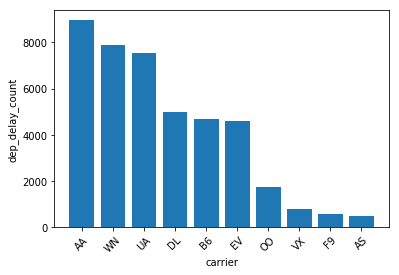

In [65]:
_.bar()

In [66]:
%%sql
SELECT carrier,count(arr_delay) AS arr_delay_count
FROM flight_perf 
JOIN airline
ON flight_perf.airline_key = airline.airline_key
JOIN airport
ON flight_perf.arr_airport_key = airport.airport_key
WHERE arr_delay>0 AND state = 'VA'
GROUP BY carrier
ORDER BY arr_delay_count DESC

 * postgresql://student@/FinalProject
10 rows affected.


carrier,arr_delay_count
AA,11423
WN,8024
UA,6705
B6,5219
DL,5145
EV,5039
OO,2341
VX,1119
F9,678
AS,567


<BarContainer object of 10 artists>

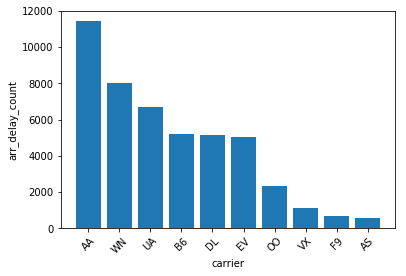

In [67]:
_.bar()

For flights of which the origin or the destination is in Virginia, American Airlines has the highest total amount of delayed flights. Alaska Airlines has the lowest amuont of delayed flights. 

The following query measures the most arrival and departure delays by average delay time.

In [68]:
%%sql
SELECT carrier,ROUND(avg(dep_delay),2) AS average_departure_delay
FROM flight_perf 
JOIN airline ON flight_perf.airline_key = airline.airline_key
JOIN airport ON flight_perf.dep_airport_key = airport.airport_key
WHERE dep_delay>0 AND airport.state = 'VA'
GROUP BY carrier
ORDER BY average_departure_delay DESC

 * postgresql://student@/FinalProject
10 rows affected.


carrier,average_departure_delay
EV,67.36
OO,59.82
B6,49.80
F9,48.29
UA,43.92
VX,43.79
DL,40.42
AA,39.11
AS,29.28
WN,28.21


<BarContainer object of 10 artists>

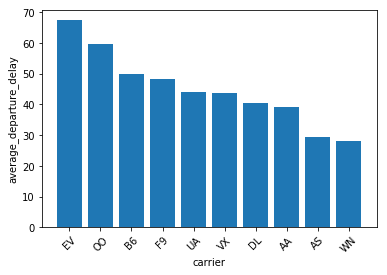

In [69]:
_.bar()

For flights of which the origin is in Virginia, ExpressJet (EV) has the highest average delay minutes while Southwest has the lowest average delay minutes.

In [70]:
%%sql
SELECT carrier,ROUND(avg(arr_delay),2) AS average_arrival_delay
FROM flight_perf 
JOIN airline ON flight_perf.airline_key = airline.airline_key
JOIN airport ON flight_perf.arr_airport_key = airport.airport_key
WHERE dep_delay>0 AND airport.state = 'VA'
GROUP BY carrier
ORDER BY average_arrival_delay DESC

 * postgresql://student@/FinalProject
10 rows affected.


carrier,average_arrival_delay
EV,54.80
B6,44.99
OO,43.43
AA,31.13
F9,29.55
DL,25.91
UA,25.57
VX,22.51
WN,20.85
AS,19.37


<BarContainer object of 10 artists>

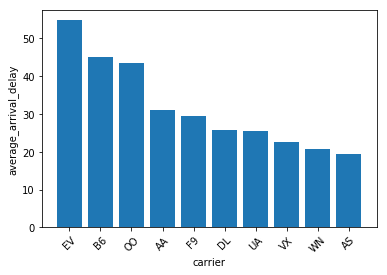

In [71]:
_.bar()

For flights of which the destination is in Virginia, ExpressJet (EV) has the highest average delay minutes while Alaska has the lowest average delay minutes.

**Which Virginia airport experiences the most / least delays (for arrivals and departures)?**

For all departures leaving Virginia airports:

In [72]:
%%sql
(SELECT name, ROUND(AVG(dep_delay),2) AS avg_dep_delay
FROM flight_perf
JOIN airport
ON flight_perf.dep_airport_key = airport.airport_key
WHERE dep_delay >0 AND state = 'VA'
GROUP BY name
ORDER BY avg_dep_delay DESC
LIMIT 1)

UNION ALL

(SELECT name, ROUND(AVG(dep_delay),2) AS avg_dep_delay
FROM flight_perf
JOIN airport
ON flight_perf.dep_airport_key = airport.airport_key
WHERE dep_delay >0 AND state = 'VA'
GROUP BY name
ORDER BY avg_dep_delay
LIMIT 1)

 * postgresql://student@/FinalProject
2 rows affected.


name,avg_dep_delay
CHO,70.00
DCA,39.83


From the above query, we can conclude that CHO (Charlottesville–Albemarle Airport) has the highest average departure delay and that DCA (Ronald Reagan Washington National Airport) has the lowest average departure delay.

For all arrivals into Virginia airports:

In [73]:
%%sql
(SELECT name, ROUND(AVG(arr_delay),2) AS avg_arr_delay
FROM flight_perf
JOIN airport
ON flight_perf.arr_airport_key = airport.airport_key
WHERE dep_delay >0 AND state = 'VA'
GROUP BY name
ORDER BY avg_arr_delay DESC
LIMIT 1)

UNION ALL

(SELECT name, ROUND(AVG(arr_delay),2) AS avg_arr_delay
FROM flight_perf
JOIN airport
ON flight_perf.arr_airport_key = airport.airport_key
WHERE dep_delay >0 AND state = 'VA'
GROUP BY name
ORDER BY avg_arr_delay
LIMIT 1)

 * postgresql://student@/FinalProject
2 rows affected.


name,avg_arr_delay
CHO,54.54
IAD,26.39


From the above query, we can conclude that CHO (Charlottesville–Albemarle Airport) has the highest average arrival delay and that IAD (Washington Dulles International Airport) has the lowest average departure delay.

**What are the main causes for delays?**

In [74]:
%%sql
SELECT (select count(reason_carrier) AS carrier_delay_count FROM flight_perf WHERE reason_carrier != 0),
       (select count(reason_weather) AS weather_delay_count FROM flight_perf WHERE reason_weather !=0),
       (select count(reason_airtraffic) AS airtraffic_delay_count FROM flight_perf WHERE reason_airtraffic !=0),
       (select count(reason_security) AS security_delay_count FROM flight_perf WHERE reason_security !=0),
       (select count(reason_lateplane) AS lateplane_delay_count FROM flight_perf WHERE reason_lateplane !=0)
FROM flight_perf
LIMIT 1

 * postgresql://student@/FinalProject
1 rows affected.


carrier_delay_count,weather_delay_count,airtraffic_delay_count,security_delay_count,lateplane_delay_count
25105,2999,26979,95,24909


The most popular reason for delay is air traffic delay, and the least popular one is security delay.

In [75]:
%%sql
SELECT (select round(avg(reason_carrier),2) AS carrier_delay_avg FROM flight_perf WHERE reason_carrier != 0),
       (select round(avg(reason_weather),2) AS weather_delay_avg FROM flight_perf WHERE reason_weather !=0),
       (select round(avg(reason_airtraffic),2) AS airtraffic_delay_avg FROM flight_perf WHERE reason_airtraffic !=0),
       (select round(avg(reason_security),2) AS security_delay_avg FROM flight_perf WHERE reason_security !=0),
       (select round(avg(reason_lateplane),2) AS lateplane_delay_avg FROM flight_perf WHERE reason_lateplane !=0)
FROM flight_perf
LIMIT 1

 * postgresql://student@/FinalProject
1 rows affected.


carrier_delay_avg,weather_delay_avg,airtraffic_delay_avg,security_delay_avg,lateplane_delay_avg
42.36,53.44,31.21,43.51,51.76


Among the reasons that cause flight arrival delays, weather delay has the largest value of average delay minutes, and airtraffic has the samllest value of average delay minutes.

#### What are the timeblocks in the day when there is the highest/lowest average delay?

In [76]:
%%sql
SELECT timeblock, round(avg(dep_delay),2) AS avg_arr_delay
FROM flight_perf
JOIN datetime
ON flight_perf.dep_datetime_key = datetime.datetime_key
JOIN airport on flight_perf.dep_airport_key = airport.airport_key
WHERE airport.state = 'VA' AND dep_delay>0
GROUP BY timeblock
ORDER BY timeblock

 * postgresql://student@/FinalProject
18 rows affected.


timeblock,avg_arr_delay
0001-0559,41.17
0600-0659,37.65
0700-0759,44.16
0800-0859,42.34
0900-0959,39.46
1000-1059,42.17
1100-1159,33.13
1200-1259,36.80
1300-1359,34.89
1400-1459,47.33


In [77]:
%%sql
SELECT timeblock, round(avg(dep_delay),2) AS avg_arr_delay
FROM flight_perf
JOIN datetime
ON flight_perf.dep_datetime_key = datetime.datetime_key
JOIN airport on flight_perf.arr_airport_key = airport.airport_key
WHERE airport.state = 'VA' AND dep_delay>0
GROUP BY timeblock
ORDER BY timeblock

 * postgresql://student@/FinalProject
19 rows affected.


timeblock,avg_arr_delay
0001-0559,34.12
0600-0659,31.47
0700-0759,28.15
0800-0859,30.03
0900-0959,26.79
1000-1059,28.74
1100-1159,30.73
1200-1259,32.64
1300-1359,29.96
1400-1459,35.01


<img src="https://s3.amazonaws.com/2018-dmfa-group7/final_project/delay_timeblock_combined.png"/>

For flights that departs from VA, more average delay minutes is experienced in 1800-1859,1900-1959,2000,2059,2100-2159 compared to other time in the day. This consecutive longer delay time indicates the time interval from 1800-2159 is the busiest time for airports in VA.
<br>
For flights that arrives at VA, we observed similar patterns that the peak is at 2100-2159. It is also found that flights arrive at VA at 0800-0859 in the morning has the lowest average arrival delay minutes.

---

### Bonus - Augment

*Please note: we assumed that when the question stated "Pull this additional data into your chosen environment" we were not required to add it to our current star schema. But instead compare it side by side or by using non-index keys.*

We chose to add two additional datasets:
- The FAA's 2017 Aircraft Registration Database (https://www.faa.gov/licenses_certificates/aircraft_certification/aircraft_registry/releasable_aircraft_download/)
- NOAA's Weather Daily Summary Database (https://www.ncdc.noaa.gov/cdo-web/)

#### Aicraft Tail Numbers

All US aicrafts are required by law to be registered with the Federal Aviation Administration, whether they are a small one-person glyder or a massive jumbo jet, all flying aircraft are given a number called the "N-Number" which can be compared to a phone number. The reason for this comparison is that a N-Number may be transferred or renewed over time, meaning that an aicraft may have multiple registration numbers over the course of its lifespan. This makes it particularly challenging when analyzing data as the information provided on our original dataset is static in time (i.e.: a plane that flew in January may have one registration then, and have another one by December). Furthermore, the dataset that contains information about the aicraft model and manufacturer associated to each N-Number provides numeric data (i.e.: an Airbus A350 is not labelled as such but instead is coded as 3940050). This would not be very helpful because we want to actually see the aircraft model and not just its model ID. 

We had two issues to overcome: ensuring that we had the correct registration number for each aicraft, and obtaining readable information. We solved these by combining three different tables from the FAA, the 2017 Master Registration dataset, the 2017 Deregistrations dataset, and the Aircraft Reference Table. By using Triffacta we were able to append the deregistrations dataset to the master registration dataset (excluding the registrations number that already existed in the master table), and then joining the combined dataset with the reference table to obtain readable information about each aicraft.

Let's start by identifying the variables in the data:

In [78]:
!csvcut -n tail_numbers.csv

  1: N-NUMBER
  2: MFR_NEW
  3: MODEL
  4: NO-ENG
  5: NO-SEATS


In [79]:
!csvstat --count tail_numbers.csv

Row count: 148911


In [80]:
!head tail_numbers.csv | csvstat

  1. "N-NUMBER"

	Type of data:          Text
	Contains null values:  False
	Unique values:         9
	Longest value:         6 characters
	Most common values:    N91296 (1x)
	                       N86TZ  (1x)
	                       N164RS (1x)
	                       N69HF  (1x)
	                       N846E  (1x)

  2. "MFR_NEW"

	Type of data:          Text
	Contains null values:  False
	Unique values:         8
	Longest value:         24 characters
	Most common values:    DAWN AIR INC (2x)
	                       DORSCHNER DOUGLAS HAROLD (1x)
	                       USZUKO TIMOTHY C (1x)
	                       SMITH RON (1x)
	                       FEUCHTER HOMER WILBUR (1x)

  3. "MODEL"

	Type of data:          Text
	Contains null values:  False
	Unique values:         8
	Longest value:         14 characters
	Most common values:    EZ FLYER (2x)
	                       MARINER (1x)
	                       RUTAN LONG EZE (1x)
	                       RV6A (1x)
	                 

Let's add it to our database! We'll first create a table:

In [81]:
%%sql
DROP TABLE IF EXISTS tails;

CREATE TABLE tails (
    number VARCHAR(6),
    manufacturer VARCHAR(50),
    model VARCHAR(30),
    engines INTEGER,
    seats INTEGER
)

 * postgresql://student@/FinalProject
Done.
Done.


[]

Now that the table has been created, we will fill it with the contents in our *flights.csv* file:

In [82]:
%%sql
COPY tails FROM '/home/ubuntu/tail_numbers.csv'
CSV
HEADER;

 * postgresql://student@/FinalProject
148911 rows affected.


[]

Let's preview our table:

In [83]:
%%sql
SELECT * 
FROM tails
LIMIT 5

 * postgresql://student@/FinalProject
5 rows affected.


number,manufacturer,model,engines,seats
N91296,DORSCHNER DOUGLAS HAROLD,MARINER,1,2
N86TZ,USZUKO TIMOTHY C,RUTAN LONG EZE,1,2
N164RS,SMITH RON,RV6A,1,2
N69HF,FEUCHTER HOMER WILBUR,RV6,1,2
N846E,RICHARDSON RONALD B,RV-6,1,2


Great!

**Which aircraft models were mainly used in 2017?**

In [84]:
%%sql
SELECT tails.model, count(tails.model), tails.manufacturer
FROM tails
    LEFT OUTER JOIN aircraft ON aircraft.tail = tails.number 
    INNER JOIN flight_perf ON aircraft.aircraft_key = flight_perf.aircraft_key
GROUP BY tails.model, tails.manufacturer
ORDER BY count DESC
LIMIT 10

 * postgresql://student@/FinalProject
10 rows affected.


model,count,manufacturer
ERJ 190-100 IGW,27173,EMBRAER
737-7H4,26801,BOEING
737-924ER,21666,BOEING
A320-232,15514,AIRBUS
MD-88,11786,MCDONNELL
EMB-145LR,9706,EMBRAER
CL-600-2C10,9398,BOMBARDIER INC
737-824,9390,BOEING
A321-211,6282,AIRBUS
CL-600-2B19,6044,BOMBARDIER INC


It appears that the ERJ-190 aircraft made by the Brazilian manufacturer Embraer dominated the domestic flight market. These are usually the planes operated by United Express, American Eagle... for regional flights. The Boeing 737 is very close and if you combine the variants, this model is the market leader. This is not surprising as some airlines such as Southwest only have 737s in their fleet. 

**What are the most frequent airplanes seen at Washington Reagan (DCA)?**

In [85]:
%%sql
SELECT tails.model, count(tails.model) as plane, airport.name as airport, airport.state
FROM tails
    LEFT JOIN aircraft ON aircraft.tail = tails.number 
    INNER JOIN flight_perf ON aircraft.aircraft_key = flight_perf.aircraft_key
    INNER JOIN airport ON flight_perf.dep_airport_key = airport.airport_key
GROUP BY tails.model, airport.name, airport.state
HAVING airport.name = 'DCA'
ORDER BY plane DESC
LIMIT 10

 * postgresql://student@/FinalProject
10 rows affected.


model,plane,airport,state
737-7H4,10416,DCA,VA
ERJ 190-100 IGW,9037,DCA,VA
A321-211,3139,DCA,VA
EMB-145LR,2702,DCA,VA
A320-232,2244,DCA,VA
ERJ 170-200 LR,1981,DCA,VA
737-890,1440,DCA,VA
A320-212,1140,DCA,VA
MD-90-30,1118,DCA,VA
A319-131,1088,DCA,VA


**What about Washington Dulles (IAD)?**

In [86]:
%%sql
SELECT tails.model, count(tails.model) as plane, airport.name as airport, airport.state
FROM tails
    LEFT JOIN aircraft ON aircraft.tail = tails.number 
    INNER JOIN flight_perf ON aircraft.aircraft_key = flight_perf.aircraft_key
    INNER JOIN airport ON flight_perf.dep_airport_key = airport.airport_key
GROUP BY tails.model, airport.name, airport.state
HAVING airport.name = 'IAD'
ORDER BY plane DESC
LIMIT 10

 * postgresql://student@/FinalProject
10 rows affected.


model,plane,airport,state
737-924ER,10502,IAD,VA
A320-232,5248,IAD,VA
737-824,3726,IAD,VA
ERJ 190-100 IGW,1976,IAD,VA
A320-214,1946,IAD,VA
MD-88,1655,IAD,VA
757-224,1289,IAD,VA
737-7H4,1067,IAD,VA
717-200,748,IAD,VA
737-900ER,631,IAD,VA


When you compare the two results, you can easily tell that IAD is capable of handling more larger planes than DCA. For example, one would never see a 757 landing in DCA. On the other hand, one would see more small planes such as the ERJs and EMBs in DCA.

**Is there a particular aircraft that had more overall delays in 2017?**

In [87]:
%%sql
SELECT tails.model, ROUND(AVG(flight_perf.dep_delay),2) as dep_delay, ROUND(AVG(flight_perf.arr_delay),2) as arr_delay
FROM tails
    LEFT JOIN aircraft ON aircraft.tail = tails.number 
    INNER JOIN flight_perf ON aircraft.aircraft_key = flight_perf.aircraft_key
WHERE flight_perf.dep_delay>0 AND flight_perf.arr_delay>0
GROUP BY tails.model
ORDER BY dep_delay DESC
LIMIT 20

 * postgresql://student@/FinalProject
20 rows affected.


model,dep_delay,arr_delay
PC-12/47E,163.20,160.60
767-322,145.65,142.04
737-732,127.95,122.10
A319-111,112.70,106.09
737-700,110.50,95.38
SR22T,105.33,94.00
MU-2B-60,104.90,105.10
525,96.75,100.75
AIRCAM,89.88,81.88
G-IV,84.94,83.54


These are surprising findings. Ignoring the errors that will be described shortly, it appears that larger aircraft have more minute dealays. For example the Boeing 767, 777 and 757 which are usually used for long-haul flights, appear to experience more delays than smaller aircrafts such as the Boeing 737 or Embraer 145.

The PC-12/47E is a general aviation aircraft (for nine people), which provides an example of something that was discussed earlier in this section: registration numbers are always changing and there's no efficient way to obtain a day-of-data-entry static record. This could be a recommendation that could be sent to the Bureau of Transportation Statistics, there should be a new column in the data labbeled 'NEW_TAIL_NUM' that includes the latest tail number associated to an aicraft.


Given that this would required a manual check of each tail number we will move to the next table.

In addition, further data processing could be used to group aircraft into families (i.e.: 737 family, A320 family...) rather than having all different models.

#### Weather

The National Oceanic and Atmospheric Administration (NOAA) is the most important US government agency when it comes to weather data. The agency providers a myriad of weather-related data, including daily summaries for all weather stations spread across the United States. As it was pointed in the earlier steps of our analysis, weather is one of the main causes for delays. Given the importance of this factor, we decided to investigate the weather conditions (precipitations, wind, weather types...) and try to establish a link between a certain weather event and delays.

The dataset we are using is a combination of daily weather reports for Washington Reagan (DCA), Washington Dulles (IAD), Norfolk International (ORF), and Richmond International (RIC). Each day (row) contains the following variables:

In [88]:
!csvcut -n va_weather.csv

  1: NAME
  2: AIRPORT
  3: DATE
  4: MONTH
  5: DAY
  6: YEAR
  7: AWND
  8: PRCP
  9: SNOW
 10: TAVG
 11: FOG/ICE_FOG/FREEZE_FOG
 12: HEAVY_FOG/HEAVY_FREEZING_FOG
 13: THUNDER
 14: ICE/SLEET/SMALL_SNOW
 15: HAIL
 16: GLAZE/RIME
 17: DUST/ASH/SAND
 18: BLOWING_SNOW


Columns 11 through 18 are indicator columns. A "1" indicates that that particular weather condition occured during the day.

In [89]:
!csvstat --count va_weather.csv

Row count: 1460


The row count matches what we expected. 364 days x 4 airports = 1,460 records.

In [90]:
!head va_weather.csv | csvstat

  1. "NAME"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         46 characters
	Most common values:    WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US (9x)

  2. "AIRPORT"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         3 characters
	Most common values:    IAD (9x)

  3. "DATE"

	Type of data:          Date
	Contains null values:  False
	Unique values:         9
	Smallest value:        2017-01-01
	Largest value:         2017-01-09
	Most common values:    2017-01-01 (1x)
	                       2017-01-02 (1x)
	                       2017-01-03 (1x)
	                       2017-01-04 (1x)
	                       2017-01-05 (1x)

  4. "MONTH"

	Type of data:          Boolean
	Contains null values:  False
	Unique values:         1
	Most common values:    True (9x)

  5. "DAY"

	Type of data:          Number
	Contains null values:  False
	Unique values:         9
	Smallest 

Let's add it to our database! We'll first create a table:

In [3]:
%%sql
DROP TABLE IF EXISTS weather;

CREATE TABLE weather (
    name VARCHAR(100),
    airport CHAR(3),
    date DATE,
    day INTEGER,
    month INTEGER,
    year INTEGER,
    wind_avg FLOAT(8),
    rain FLOAT(8),
    snow FLOAT(8),
    temp_avg FLOAT(8),
    fog INTEGER,
    heavy_fog INTEGER,
    thunder INTEGER,
    ice_smallsnow INTEGER,
    hail INTEGER,
    glaze INTEGER,
    dust_assh INTEGER,
    snow_blowing INTEGER
)

 * postgresql://student@/FinalProject
Done.
Done.


[]

Now that the table has been created, we will fill it with the contents in our *flights.csv* file:

In [4]:
%%sql
COPY weather FROM '/home/ubuntu/va_weather.csv'
CSV
HEADER;

 * postgresql://student@/FinalProject
1460 rows affected.


[]

Let's preview our table:

In [93]:
%%sql
SELECT * 
FROM weather
LIMIT 5

 * postgresql://student@/FinalProject
5 rows affected.


name,airport,date,day,month,year,wind_avg,rain,snow,temp_avg,fog,heavy_fog,thunder,ice_smallsnow,hail,glaze,dust_assh,snow_blowing
"WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US",IAD,2017-01-01,1,1,2017,1.8,0.0,0.0,6.1,0,0,0,0,0,0,0,0
"WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US",IAD,2017-01-02,1,2,2017,2.6,6.9,0.0,5.6,1,0,0,0,0,0,0,0
"WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US",IAD,2017-01-03,1,3,2017,2.1,23.4,0.0,5.4,1,1,0,0,0,0,0,0
"WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US",IAD,2017-01-04,1,4,2017,4.9,0.5,0.0,7.6,1,1,0,0,0,0,0,0
"WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US",IAD,2017-01-05,1,5,2017,1.7,0.0,0.0,-0.7,0,0,0,0,0,0,0,0


According to some connections at United Airlines, the leading cause for delays during the summer months is thunder storms. Let's see if there's a relationship between thunderstorms and delays:

For departures:

<img src="https://s3.amazonaws.com/2018-dmfa-group7/final_project/thunder.png"/>

**Let's investigate the weather conditions per month and compare them with delays:**

We can now clearly see the difference between a day with and without thunderstorms. Of course there are other factors that lead to delays but this is one of them.

In [5]:
%%sql
SELECT month, avg(rain) as avg_rain, avg(snow) as avg_snow
FROM weather
GROUP BY month
ORDER BY month

 * postgresql://student@/FinalProject
31 rows affected.


month,avg_rain,avg_snow
1,1.54583334674438,0.0
2,3.71875003352761,0.0
3,1.98749996473392,0.0625
4,0.893749995778004,0.0
5,5.44375001639128,0.0
6,4.91041675209999,0.125
7,4.79166669646899,7.04166666666667
8,2.67708333209157,1.27083333333333
9,1.95416665698091,3.60416666666667
10,0.425000008195639,0.0


The following line of code will take a few minutes to run.

In [ ]:
%%sql
SELECT datetime.month, airport.name, ROUND(AVG(flight_perf.arr_delay),2) as arr_delay, AVG(weather.rain) as rain, AVG(weather.snow) as snow
FROM weather
    INNER JOIN airport ON weather.airport = airport.name
    INNER JOIN datetime ON weather.day = datetime.day AND weather.month = datetime.month AND weather.year = datetime.year
    INNER JOIN flight_perf ON datetime.datetime_key = flight_perf.arr_datetime_key AND airport.airport_key = flight_perf.arr_airport_key
WHERE flight_perf.arr_delay > 0 
GROUP BY datetime.month, airport.name
HAVING airport.name = 'IAD'
ORDER BY datetime.month ASC
LIMIT 10

 * postgresql://student@/FinalProject


<img src="https://s3.amazonaws.com/2018-dmfa-group7/final_project/Rain_Delays.png"/>

As the graphs show, rain appears to have an impact on arrivals and delays for all Virginia airports. Whenever the rainfall increases then so do delays. Please note that towards the end of the year and beginnin of the month rainfall will most likely be snow. The visualization below displays this:

<img src="https://s3.amazonaws.com/2018-dmfa-group7/final_project/snow.png"/>

The year of 2017 was rather weak for snowfall. Nonetheless, we can see that as snowfall imcreases then so do departure and arrival delays.

---

### Team Member Contributions & Attestations

**Ran He:**
- Collaborated on schema design
- Descibed variables, identified facts and dimensions based on the schema
- Collaborated on data wrangling 
- Collaborated on slides creation
- I attest that everyone contributed substantially

**Martim Silva:**
- Identified the dataset
- Pre-processed data (selecting variables to download)
- Collaborated on schema design
- Supported data wranggling tasks
- Worked on the bonus section
- Develop some Tableau visualizations
- Added markdown comments and reviewed notebook before submission
- I attest that everyone contributed substantially

**Maggie Wang:**
- Collaborated on schema design
- Supported data wranggling tasks
- Worked on data analysis to address main questions that we want to solve
- Added markdown commments for each analysis
- Combined notebooks for final review
- I attest that everyone contributed substantially

**Mengfei Zhou:**
- Collaborated on schema design
- Descibed variables, identified facts and dimensions based on the schema
- Collaborated on data wrangling 
- Collaborated on slides creation
- I attest that everyone contributed substantially

We all attest that this project was completed in accordance with GW's Code of Academic Integrity.